In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
lamarck = pd.read_csv("./Lamarck_percent.csv", header=0, index_col=[0])
print(lamarck.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/SSGA/SSGA_percent.csv"
SSGA = pd.read_csv(path,header=0,index_col=[0])
print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/Baldwin/Baldwin_percent.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0])
print(baldwin.shape)

df_together = pd.concat([lamarck,SSGA,baldwin],axis=0,keys=["Lamarck","SSGA","Baldwin"])
print(df_together.shape)
df_together = df_together.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
print(df_together.dtypes)

(23, 20)
(23, 20)
(23, 20)
(69, 20)
590    object
593    object
579    object
588    object
589    object
591    object
576    object
587    object
569    object
558    object
592    object
572    object
594    object
542    object
570    object
562    object
575    object
573    object
552    object
555    object
dtype: object


         Function     
Lamarck  F1        590    100
                   593    100
                   579    100
                   588    100
                   589    100
                         ... 
Baldwin  F23       562     80
                   575     80
                   573     90
                   552    100
                   555    100
Length: 1380, dtype: object

,Function,Mode,Combinations,Percent
0,F1,Lamarck,590,100
1,F1,Lamarck,593,100
2,F1,Lamarck,579,100
3,F1,Lamarck,588,100
4,F1,Lamarck,589,100
...,...,...,...,...
1375,F23,Baldwin,562,80
1376,F23,Baldwin,575,80
1377,F23,Baldwin,573,90
1378,F23,Baldwin,552,100


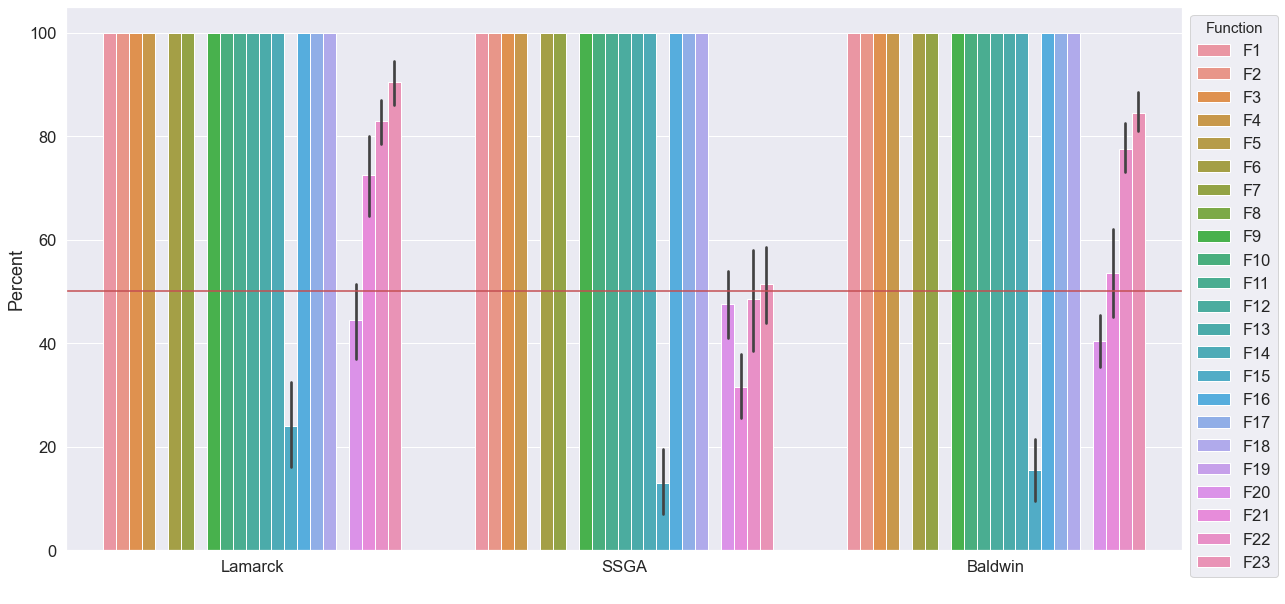

In [47]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
mode_list=["SSGA","Baldwin","Lamarck"]
def show_graph(dataframe):
    sns.set(font_scale=1.5)
    sns.color_palette("viridis", as_cmap=True)
    dist_cols = 1
    dist_rows = 1
    plt.figure(figsize=(20 * dist_cols, 10 * dist_rows))
    i = 1
    plt.subplot(dist_rows, dist_cols, i)
    ax = sns.barplot(data=dataframe,y="Percent",hue="Function",x="Mode",dodge=True)
    plt.xlabel(" ")
    plt.axhline(50,color="r")
    plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig("./together_barplot__percent{0}.png".format("lamarck_SSGA_Baldwin"), dpi=1200,bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [9]:
global_opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,
                    -10.1532, -10.4028, -10.5363]
df_opt = dataframe.copy()
cdf=[]
for f in range(1,24,1):
    opt = global_opt[f-1]
    f = "F"+str(f)
    dataf = df_opt[df_opt["Function"] == f]
    dataf["Percent"] = opt
    cdf.append(dataf)
cdf = pd.concat(cdf,axis=0)
cdf.rename(columns={'Percent': 'optimal'}, inplace=True)
print(cdf)

     Function     Mode Combinations  optimal
0          F1  Lamarck          590   0.0000
1          F1  Lamarck          593   0.0000
2          F1  Lamarck          579   0.0000
3          F1  Lamarck          588   0.0000
4          F1  Lamarck          589   0.0000
...       ...      ...          ...      ...
1375      F23  Baldwin          562 -10.5363
1376      F23  Baldwin          575 -10.5363
1377      F23  Baldwin          573 -10.5363
1378      F23  Baldwin          552 -10.5363
1379      F23  Baldwin          555 -10.5363

[1380 rows x 4 columns]


/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_42781/2669352897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf["Percent"] = opt


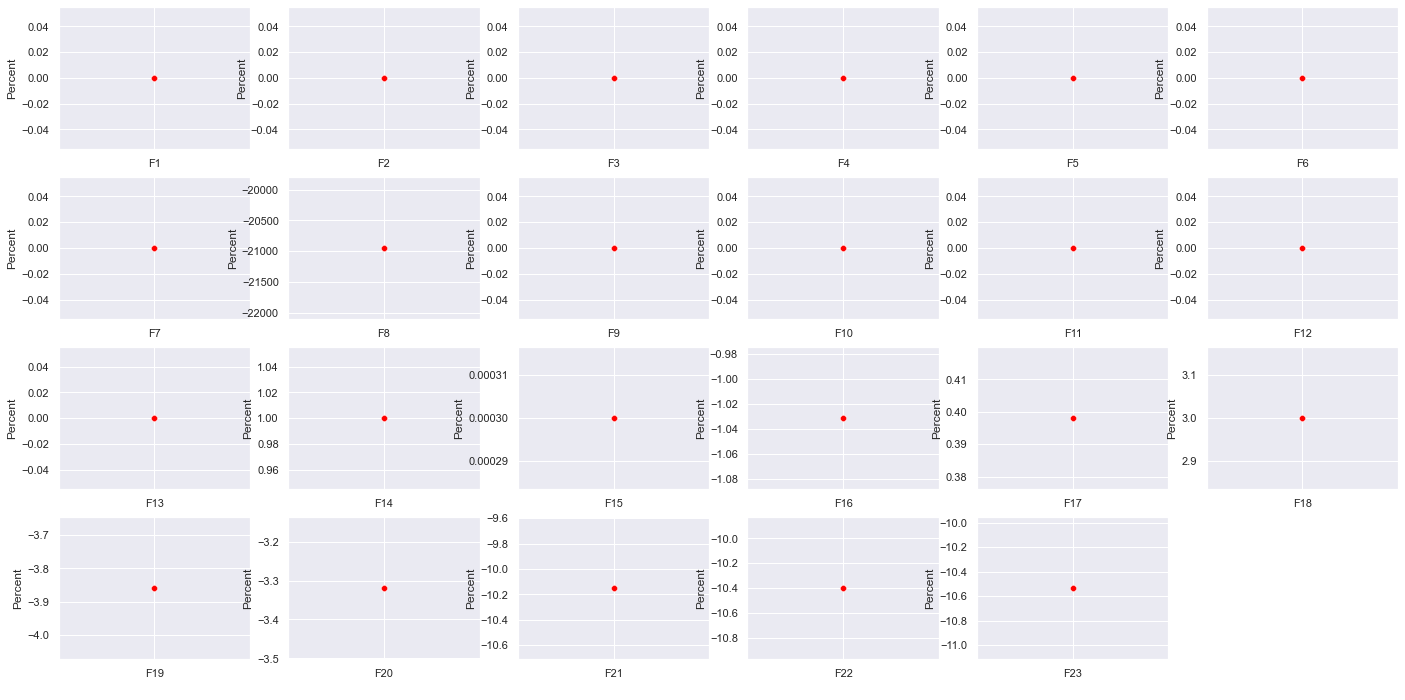

In [10]:
def show_graph(dataframe):
    sns.set()
    dist_cols = 6
    dist_rows = 4
    plt.figure(figsize=(4 * dist_cols, 3 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        dataf2 = cdf[cdf["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        # sns.boxplot(data=dataf, y="Percent", x="Function",hue="Mode",palette="viridis")
        sns.scatterplot(data=dataf2,y="optimal",x="Function",color ="red")
        plt.xlabel(" ")
        plt.ylabel("Percent")
        i = i + 1
    plt.savefig("./together_Percent_optimal_{0}.pdf".format("lamarck_SSGA_Baldwin"), dpi=1200)
    plt.show()
show_graph(dataframe=dataframe)